# Reading HDF5 files

For the project, we are going to analyze a dataset composed by `hdf5` files with many 2D beam profile images. In this jupyter notebook, we will learn how to open an `hdf5` file in Python and inspect the data in it. `hdf5` is a high-performance hierarchical data format to manage heterogeneous data. It is widely used in industry and science. In order to manage `hdf5` in Python, we can make use of the `h5py` Python package (https://www.h5py.org/).

In [1]:
import h5py  # if not installed, run 'pip install h5py' inside your conda environment
import matplotlib.pyplot as plt

In [2]:
fname = 'test-file.h5'  # name of the file to read

In [3]:
f = h5py.File(fname, 'r')  # load the file in read-only mode
f  # see what is f

<HDF5 file "test-file.h5" (mode r)>

The file is loaded as an hdf5 file object in Python, which is similar to a Python dictionary (see the documentation at https://docs.h5py.org/en/stable/quick.html#core-concepts )
one can list the keys, just as a dictionary:

In [4]:
list(f.keys())

['images']

For the data I took, there is only one key: images. Lets access it.

In [5]:
f['images']

<HDF5 dataset "images": shape (10, 700, 700), type "<f8">

it is an hdf5 Dataset. Datasets contain the data in numpy arrays, and attibutes of the data. Lets access and save to memory the array in the dataset

In [6]:
dset = f['images']
data = dset[()] # load the array data into memory
print(type(data))  # it is a numpy array
print(data.shape)  # in this case, it has shape (10,700,700)

<class 'numpy.ndarray'>
(10, 700, 700)


The way I saved the image data in the experiment is that for a certain configuration of the beamline, I took 10 image shots of the beam profile. Thus, the shape of 10, 700, 700 indexes the shot number in the first axis, and the 700x700 pixels in the last 2 axis of the array. Lets show these 10 images:

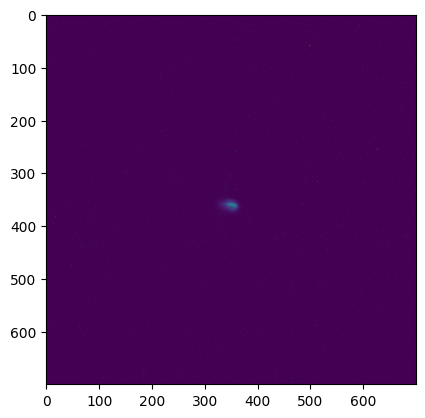

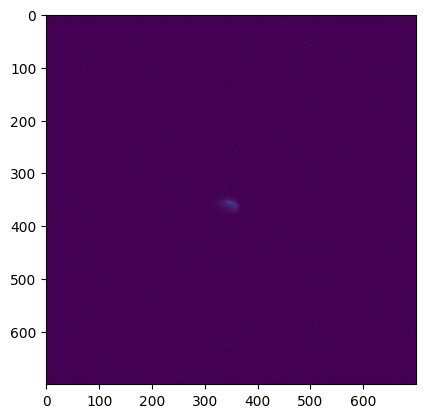

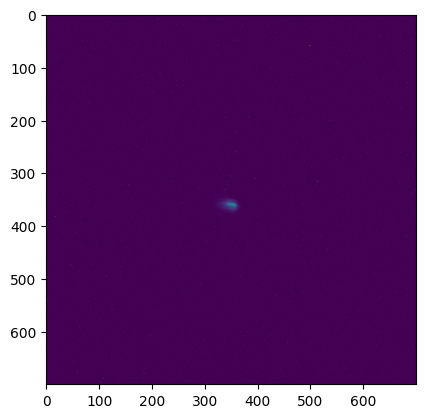

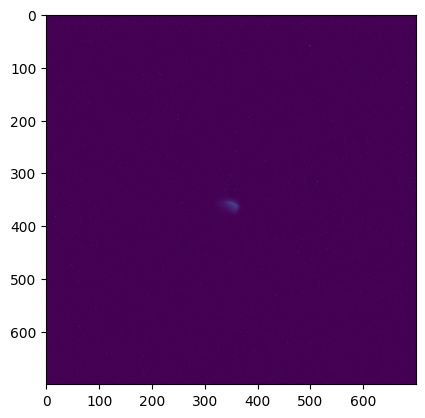

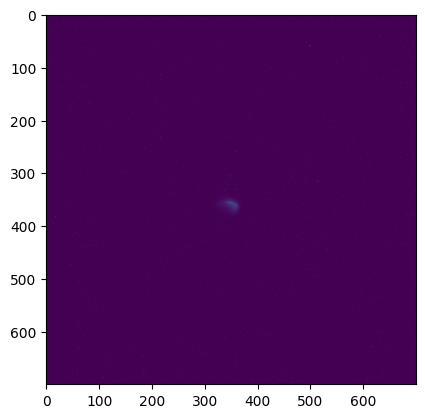

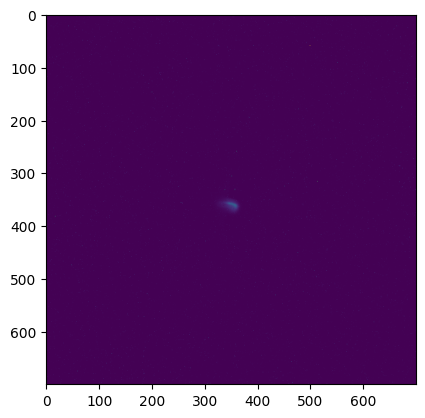

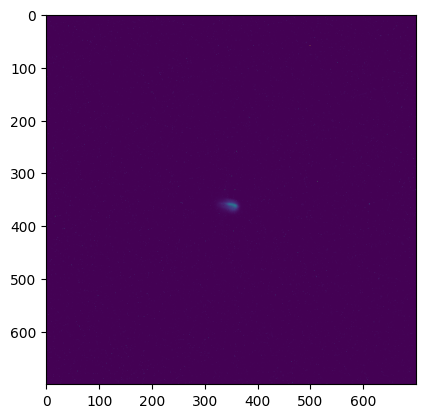

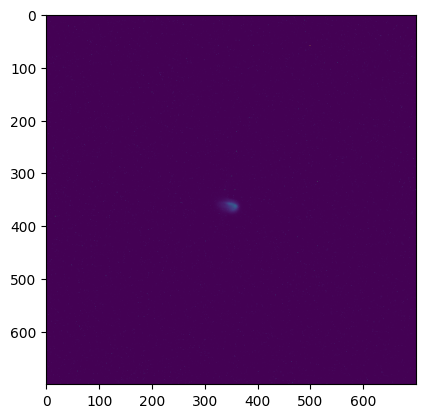

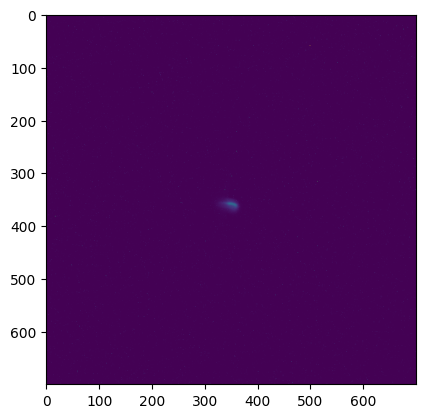

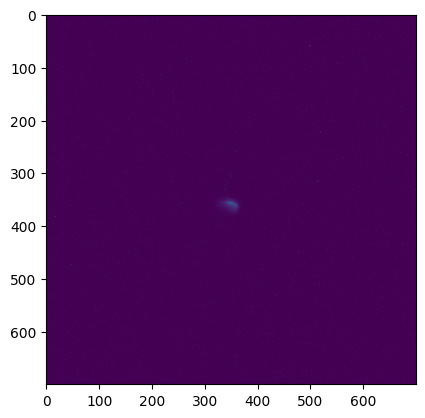

In [7]:
for i in range(data.shape[0]):
    plt.imshow(data[i,:,:])
    plt.show()

now, lets take a look at the attributes of the dataset:

In [8]:
dset.attrs

<Attributes of HDF5 object at 4421975984>

It is an atribute object, which is also similar to a Python dictionary, so we can list the keys:

In [9]:
list(dset.attrs.keys())

['AWA:Bira3Ctrl:Ch10',
 'AWA:Bira4Ctrl:Ch01',
 'AWAVXI11ICT:Ch4',
 'alias',
 'array_data_suffix',
 'array_n_cols_suffix',
 'array_n_rows_suffix',
 'background_file',
 'bounding_box_half_width',
 'charge_atol',
 'extra_pvs',
 'ip_address',
 'min_log_intensity',
 'n_fitting_restarts',
 'pi:QBCR1:Ch7:EnablePulse',
 'resolution',
 'return_statistics',
 'roi',
 'save_image_location',
 'screen_name',
 'target_charge',
 'target_charge_pv',
 'testing',
 'threshold',
 'verbose',
 'visualize',
 'wait_time']

I saved multiple attributes during the experiment. The important ones, as we discussed in class, are the quadrupole strength, dipole on/off state and transverse deflecting cavity on/off state. the corresponding keys are:

In [10]:
quad_key = 'AWA:Bira3Ctrl:Ch10'
dipole_key = 'AWA:Bira4Ctrl:Ch01'
tdc_key = 'pi:QBCR1:Ch7:EnablePulse'

In [11]:
k = dset.attrs[quad_key]
k

np.float64(0.050000000000000044)

In [12]:
d = dset.attrs[dipole_key]
d

np.int64(0)

In [13]:
tdc = dset.attrs[tdc_key]
tdc

np.int64(0)